<a href="https://colab.research.google.com/github/AmiltonCristian/machine_learning_with_free_code_camp/blob/main/LinearRegression/Iris_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installations and imports

In [17]:
from IPython.display import clear_output
!pip install tensorflow
!pip install pandas
clear_output()

In [18]:
import tensorflow as tf
import pandas as pd

#Data

**You can find the dataset used in this notebook in the follow link:**
https://data.world/uci/iris

We will export the dataframe with respective header.

In [19]:
header = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
df = pd.read_csv('https://query.data.world/s/hefzuesvkxqj3gibsxke4nahywcs22', names=header)
df.shape

(150, 5)

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


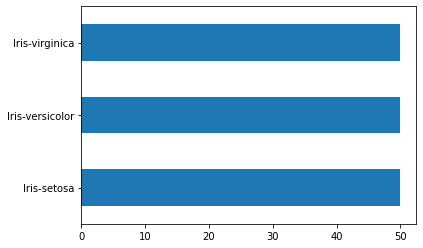

In [22]:
df.iris_class.value_counts().plot(kind='barh')

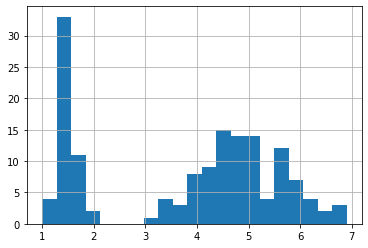

In [23]:
df.petal_length.hist(bins=21)

We need convert string values to a number. In this case only iris_class.

In [24]:
df['iris_class'] = df['iris_class'].replace('Iris-setosa', 0)
df['iris_class'] = df['iris_class'].replace('Iris-versicolor', 1)
df['iris_class'] = df['iris_class'].replace('Iris-virginica', 2)

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We will shuffle the dataframe.

In [26]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.2,3.4,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,6.0,2.9,4.5,1.5,1
3,4.6,3.1,1.5,0.2,0
4,5.5,2.4,3.8,1.1,1


We will split the dataframe into two new dataframe, one to train and another to test.

Then pop the 'iris_class' column and store it in a new variable.

80% data will be used for train and 20% to test.


In [27]:
df_train = df.sample(frac=0.8)  # separate 80% data to train
df_eval = df.drop(df_train.index)
y_train = df_train.pop('iris_class') # the ramaining 20% data to test
y_eval = df_eval.pop('iris_class')

#Feature Columns

As we have only numeric columns, categorical columns is not needed.

In [28]:
CATEGORICAL_COLUMNS = []
NUMERIC_COLUMNS = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df_train[feature_name].unique() # list of all unique column values
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


#Input function
The input function will convert pandas dataframe into tf.data.Dataset

[Click here](https://www.tensorflow.org/tutorials/estimator/linear) For more information

In [29]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(df_train, y_train, num_epochs=400)
eval_input_fn = make_input_fn(df_eval, y_eval, num_epochs=1, shuffle=False)



#The model
We will use a linear estimator to utilize the linear regression algorithm.

*n_classes* refers to dataframe_y distinct values

In [30]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgr6evu43', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#Training the model

As we have only 150 data.

The accuracy is normally between 0.93 ~ 1.0

In [31]:
model.train(train_input_fn)
result = model.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 1.0, 'average_loss': 0.13176039, 'loss': 0.13176039, 'global_step': 1600}


**The accuracy:**

In [32]:
print(result['accuracy'])

1.0
